(inv-meas-lgm-notebook)=
# Invarianza di misurazione

In questo capitolo, esaminiamo come il modello a fattore comune possa essere utilizzato nell’analisi dei dati longitudinali per studiare i cambiamenti nei fattori comuni attraverso l’uso di modelli di crescita latente. Ci concentriamo sui fattori comuni misurati da variabili osservate con punteggio continuo. La modellizzazione del cambiamento nei fattori comuni è un’estensione logica delle nostre precedenti discussioni nel framework di modellizzazione delle equazioni strutturali, dove i dati sono organizzati in forma multivariata (wide).

Un concetto chiave quando si studia il cambiamento nelle variabili latenti è stabilire una metrica comune per le variabili latenti nel tempo. A differenza delle variabili osservate analizzate nei capitoli precedenti, le variabili latenti non hanno una scala intrinseca e longitudinalmente è necessario che quella scala sia la stessa nel tempo. Questo viene tipicamente fatto testando l’invarianza fattoriale. L’invarianza fattoriale corrisponde al concetto per cui la variabile latente stia misurando lo stesso costrutto nel tempo, in modo che una differenza di un’unità nel punteggio del fattore in un momento significhi la stessa cosa in tutti i momenti.

In questo tutorial, introduciamo il test di invarianza di misura nel contesto di un modello a fattore longitudinale e come un modello di crescita latente di secondo ordine possa essere utilizzato per descrivere il cambiamento in un fattore latente.

Questo tutorial segue l’esempio fornito nel Capitolo 14 {cite:t}`grimm2016growth`. Utilizzando dati con tre misurazioni temporali succesive dall’ECLS-K, testiamo l’invarianza fattoriale e quindi utilizziamo un modello di crescita di secondo ordine per descrivere il cambiamento nei punteggi del fattore nel tempo.

## Invarianza fattoriale longitudinale

L’invarianza fattoriale longitudinale si riferisce all’equivalenza di alcuni parametri del modello a fattore comune nel tempo. Avere una struttura fattoriale invariante è un aspetto importante dell’utilizzo dell’analisi fattoriale come strumento di indagine scientifica. I fattori non hanno un'unità di misura o un significato intrinseco; la loro interpretazione deriva dalle loro relazioni con l’insieme delle variabili osservate. Se un fattore deve essere trattato come lo stesso in diverse occasioni temporali di misurazione, l’associazione di quel fattore con altre variabili deve rimanere costante nel tempo. Poiché tutti i parametri coinvolti nell’analisi dei fattori hanno il loro proprio significato intrinseco, quali parametri vengono mantenuti costanti nel tempo influisce su come interpretiamo il cambiamento nei fattori comuni.

Il test di invarianza fattoriale è una procedura multi-step che spesso comporta l’adattamento di quattro modelli con un numero crescente di vincoli. I quattro modelli sono: (1) il modello di invarianza configurale, (2) il modello di invarianza debole, (3) il modello di invarianza forte e (4) il modello di invarianza rigorosa. Ognuno di questi modelli e le loro interpretazioni vengono discussi di seguito.

Il modello di invarianza configurale richiede che il numero di fattori e la struttura delle saturazioni fattoriali siano uguali nelle diverse occasioni di misurazione. Altre caratteristiche come le varianze dei fattori e le medie dei fattori possono variare. I fattori estratti in ogni occasione possono essere interpretati in modo simile, ma non possono essere considerati come misure di costrutti identici o sulla stessa scala. Le differenze longitudinali nelle medie osservate, nelle varianze e nelle covarianze potrebbero essere dovute a cambiamenti nelle variabili osservate indipendenti dai fattori.

I modelli di invarianza configurale sono usati come punto di partenza per confrontare altri modelli con vincoli maggiori. Questi modelli presuppongono che lo stesso numero di fattori sia presente in ogni occasione di misurazione, ma questa ipotesi potrebbe non essere vera. I fattori possono cambiare nel tempo e non essere rilevabili in certe occasioni. I ricercatori dovrebbero verificare che le ipotesi dell’invarianza configurale siano soddisfatte prima di procedere con i successivi test di invarianza.

L’invarianza fattoriale debole è il modello meno vincolato tra i tre modelli di invarianza metrica descritti da Meredith (1993). Questo modello richiede che la matrice delle saturazioni fattoriali sia uguale in tutte le rilevazioni temporali, ma non impone altre restrizioni. Poiché la matrice delle saturazioni fattoriali definisce le covarianze tra le variabili osservate, l’invarianza fattoriale debole crea strutture di covarianza proporzionali nel tempo. La grandezza delle covarianze può aumentare o diminuire con la varianza dei fattori comuni, ma questo aumento o diminuzione influisce su tutte le covarianze delle variabili osservate in egual misura. Le intercette delle variabili osservate rimangono libere di variare nelle diverse occasioni temporali, quindi i cambiamenti longitudinali nelle medie delle variabili osservate non sono spiegati dal fattore(i) comune(i). Mentre il fattore(i) comune(i) è sufficientemente invariante per testare le regressioni o le covarianze tra i fattori e ulteriori variabili, i test del cambiamento longitudinale nei fattori richiedono una forma più forte di invarianza.

L’invarianza forte fornisce un livello più elevato di invarianza di misura vincolando le intercette delle variabili osservate ad essere uguali nelle diverse occasioni di misurazione e consentendo al contempo al vettore delle medie delle variabili latenti di variare nel tempo. Ciò significa che tutti i cambiamenti longitudinali nelle medie e covarianze delle variabili osservate dipendono dalle medie, varianze e covarianze tra i fattori comuni. In altre parole, i cambiamenti nelle variabili osservate sono causati da cambiamenti nei fattori comuni, il che consente l’analisi del cambiamento nel fattore comune. Poiché tutti i cambiamenti a livello medio nelle variabili osservate sono attribuibili ai fattori, l’invarianza forte è sufficiente per assumere che la scala della variabile latente non differisca nelle diverse occasioni di misurazione.

L’invarianza fattoriale rigorosa è il modello di fattore longitudinale con i vincoli più forti. Oltre ai vincoli sulle saturazioni fattoriali e sulle intercette delle variabili osservate, questo modello richiede che le varianze uniche siano uguali nelle diverse occasioni di misurazione. In questo modello, tutti i cambiamenti longitudinali nelle medie osservate, nelle varianze e nelle covarianze sono attribuiti ai cambiamenti nei fattori comuni nel tempo.

## Un esempio concreto

Questo tutorial segue l’esempio del Capitolo 14 di {cite:t}`grimm2016growth`. Utilizzando dati relativi a 3 misurazioni dell’ECLS-K, testiamo l’invarianza fattoriale e poi usiamo un modello di crescita latente di secondo ordine per descrivere il cambiamento nei punteggi fattoriali nel tempo.

Carichiamo i pacchetti necessari.

In [1]:
source("_common.R")
library("lavaan")
library("semPlot")
library("knitr")
library("markdown")
library("patchwork")
library("psych")
library("DT")
library("kableExtra")
library("lme4")
library("corrplot")
set.seed(12345)

This is lavaan 0.6-15
lavaan is FREE software! Please report any bugs.




Attaching package: ‘psych’




The following object is masked from ‘package:lavaan’:

    cor2cov




The following objects are masked from ‘package:scales’:

    alpha, rescale




The following objects are masked from ‘package:ggplot2’:

    %+%, alpha





Attaching package: ‘kableExtra’




The following object is masked from ‘package:dplyr’:

    group_rows




Loading required package: Matrix




Attaching package: ‘Matrix’




The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack




corrplot 0.92 loaded



Leggiamo i dati.

In [2]:
filepath <- "https://raw.githubusercontent.com/LRI-2/Data/main/GrowthModeling/ECLS_Science.dat"
# read in the text data file using the url() function
dat <- read.table(file = url(filepath), na.strings = ".")

names(dat) <- c(
  "id", "s_g3", "r_g3", "m_g3", "s_g5", "r_g5", "m_g5", "s_g8",
  "r_g8", "m_g8", "st_g3", "rt_g3", "mt_g3", "st_g5", "rt_g5",
  "mt_g5", "st_g8", "rt_g8", "mt_g8"
)

# selecting only the variables of interest
dat <- dat[, c(
  "id", "s_g3", "r_g3", "m_g3", "s_g5", "r_g5", "m_g5", "s_g8",
  "r_g8", "m_g8"
)]
head(dat, 10)

,id,s_g3,r_g3,m_g3,s_g5,r_g5,m_g5,s_g8,r_g8,m_g8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,3,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,8,NA,NA,NA,NA,NA,NA,103.90,204.10,166.67
4,16,51.57,142.18,115.59,65.94,141.02,133.67,86.90,169.83,156.67
5,28,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,44,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,46,72.09,154.43,96.87,79.44,170.57,116.28,89.08,192.07,132.40
8,62,34.71,106.40,87.86,47.44,145.72,104.68,NA,NA,NA
9,66,NA,NA,NA,NA,NA,NA,NA,NA,NA


Otteniamo le statistiche descrittive.

In [3]:
psych::describe(dat[, -1]) #-1 to remove the id column

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s_g3,1,1442,50.99316,15.61923,50.935,50.82393,16.76079,18.37,92.66,74.29,0.07892525,-0.59262264,0.4113174
r_g3,2,1430,127.65780,29.21853,126.975,128.44100,31.33475,51.46,195.82,144.36,-0.21267044,-0.49745888,0.7726633
m_g3,3,1442,99.71625,25.53598,102.605,99.98539,27.70979,35.72,159.40,123.68,-0.09545251,-0.70228248,0.6724653
s_g5,4,1135,65.25489,16.18239,67.530,65.99278,16.51616,22.57,103.23,80.66,-0.38887258,-0.48833195,0.4803355
r_g5,5,1133,151.09049,27.30787,152.330,153.09954,26.73128,64.69,202.22,137.53,-0.61535021,-0.03585956,0.8112841
m_g5,6,1136,124.34706,25.16900,128.645,126.08475,25.13748,50.87,169.53,118.66,-0.58188523,-0.24156271,0.7467526
s_g8,7,947,84.88585,16.71213,88.930,86.88478,14.81117,29.61,107.90,78.29,-0.99483625,0.47858090,0.5430713
r_g8,8,941,172.04634,27.72934,179.700,175.53752,24.90768,89.15,208.44,119.29,-0.98357947,0.24114648,0.9039507
m_g8,9,945,142.46749,22.50262,147.360,145.06745,21.23083,67.75,172.20,104.45,-0.93607563,0.35889468,0.7320104


Calcoliamo le correlazioni.

In [4]:
round(cor(dat[, -1], use = "pairwise.complete"), 2)

,s_g3,r_g3,m_g3,s_g5,r_g5,m_g5,s_g8,r_g8,m_g8
s_g3,1.00,0.76,0.71,0.85,0.73,0.68,0.75,0.68,0.66
r_g3,0.76,1.00,0.75,0.73,0.85,0.70,0.70,0.76,0.68
m_g3,0.71,0.75,1.00,0.70,0.72,0.88,0.71,0.66,0.81
s_g5,0.85,0.73,0.70,1.00,0.77,0.74,0.81,0.73,0.70
r_g5,0.73,0.85,0.72,0.77,1.00,0.75,0.74,0.80,0.71
m_g5,0.68,0.70,0.88,0.74,0.75,1.00,0.74,0.68,0.85
s_g8,0.75,0.70,0.71,0.81,0.74,0.74,1.00,0.78,0.78
r_g8,0.68,0.76,0.66,0.73,0.80,0.68,0.78,1.00,0.75
m_g8,0.66,0.68,0.81,0.70,0.71,0.85,0.78,0.75,1.00


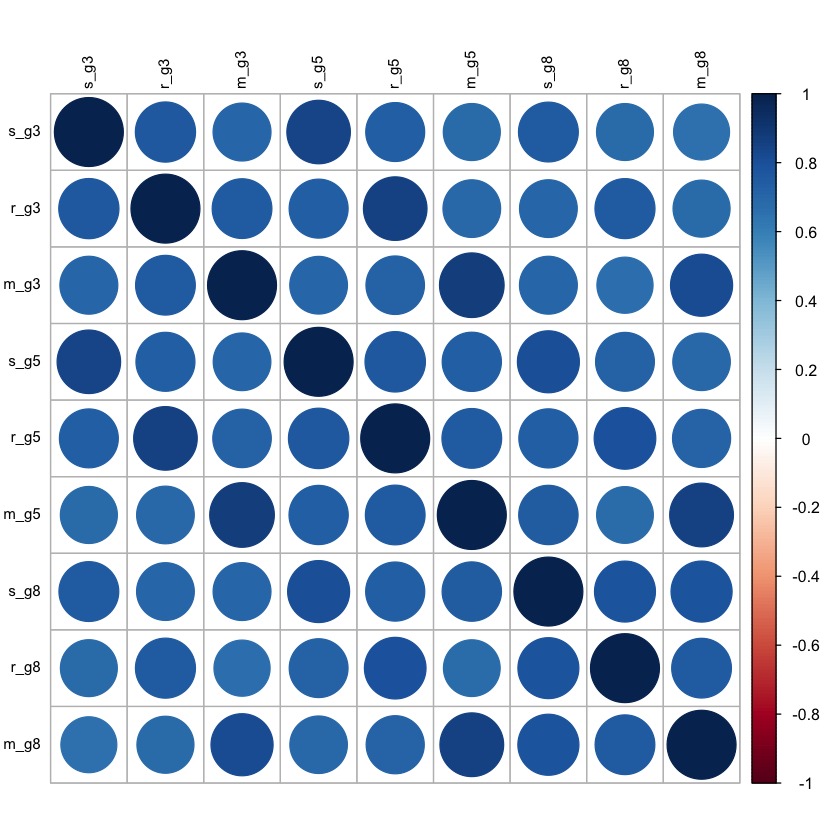

In [5]:
corrplot(cor(dat[, -1], use = "pairwise.complete"), order = "original", tl.col = "black", tl.cex = .75)

### Modello di invarianza configurale

Il modello di invarianza configurale impone pochi vincoli sulla struttura del fattore nel tempo. L’unico vincolo è che il numero di fattori e la struttura delle saturazioni fattoriali siano uguali nelle diverse occasioni di misurazione. Definiamo un fattore “rendimento accademico” per ciascuna delle 3 occasioni, utilizzando le variabili di matematica, scienze e lettura relative a quella misurazione temporale.

Anche se il fattore comune può essere interpretato in modo simile in ciascuna occasione di misurazione (ad esempio, chiamato “rendimento accademico”), questo modello non impone o assume che i fattori specifici per il tempo misurino lo stesso costrutto o che siano misurati sulla stessa scala.

Definiamo il modello nella sintassi di lavaan.

In [6]:
configural_invar <- " #opening quote
#factor loadings
  eta1 =~ lambda_S*s_g3+ #for identification
          lambda_R3*r_g3+
          lambda_M3*m_g3
  eta2 =~ lambda_S*s_g5+ #for identification
          lambda_R5*r_g5+
          lambda_M5*m_g5
  eta3 =~ lambda_S*s_g8+ #for identification
          lambda_R8*r_g8+
          lambda_M8*m_g8

#latent variable variances
   eta1~~1*eta1 #for scaling
   eta2~~eta2
   eta3~~eta3

#latent variable covariances
   eta1~~eta2
   eta1~~eta3
   eta2~~eta3

#unique variances
   s_g3~~s_g3
   s_g5~~s_g5
   s_g8~~s_g8
   r_g3~~r_g3
   r_g5~~r_g5
   r_g8~~r_g8
   m_g3~~m_g3
   m_g5~~m_g5
   m_g8~~m_g8
#unique covariances
   s_g3~~s_g5
   s_g3~~s_g8
   s_g5~~s_g8
   r_g3~~r_g5
   r_g3~~r_g8
   r_g5~~r_g8
   m_g3~~m_g5
   m_g3~~m_g8
   m_g5~~m_g8

#latent variable intercepts
   eta1~0*1 #for scaling
   eta2~1
   eta3~1

#observed variable intercepts
   s_g3~tau_S*1
   s_g5~tau_S*1
   s_g8~tau_S*1
   r_g3~tau_R3*1
   r_g5~tau_R5*1
   r_g8~tau_R8*1
   m_g3~tau_M3*1
   m_g5~tau_M5*1
   m_g8~tau_M8*1
" # closing quote

Adattiamo il modello ai dati.

In [7]:
fit_configural <- lavaan(configural_invar, data = dat, mimic = "mplus")

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some cases are empty and will be ignored:
  1 2 5 6 9 11 17 26 37 43 44 53 59 61 65 66 73 77 78 81 90 91 94 95 105 106 108 109 112 115 119 120 125 126 127 129 132 136 137 142 149 150 153 155 156 158 159 160 161 162 164 170 172 176 177 178 180 181 182 183 186 191 192 193 199 206 211 213 218 231 232 237 239 241 260 263 264 271 273 276 279 281 299 300 301 308 310 315 323 324 325 326 327 350 351 352 353 356 362 364 370 372 373 375 376 378 381 386 387 392 393 402 403 404 405 406 409 412 415 420 421 422 429 438 439 443 444 449 455 458 462 464 470 476 478 480 481 483 484 485 486 489 491 494 503 508 518 523 524 541 543 548 552 554 559 561 565 569 573 574 576 579 587 593 595 600 605 607 627 632 642 643 644 646 647 648 663 664 665 666 667 677 680 682 683 687 693 695 698 701 704 713 717 719 720 731 733 734 736 751 755 758 763 764 765 767 768 769 770 772 774 781 782 799 802 818 820 822 827 829 843 84

Esaminiamo la soluzione.

In [8]:
out = summary(fit_configural, fit.measures = TRUE)
print(out)

lavaan 0.6.15 ended normally after 281 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        43
  Number of equality constraints                     4

                                                  Used       Total
  Number of observations                          1478        2108
  Number of missing patterns                        24            

Model Test User Model:
                                                      
  Test statistic                                35.522
  Degrees of freedom                                15
  P-value (Chi-square)                           0.002

Model Test Baseline Model:

  Test statistic                             11669.413
  Degrees of freedom                                36
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.99

Generiamo il diagramma di percorso.

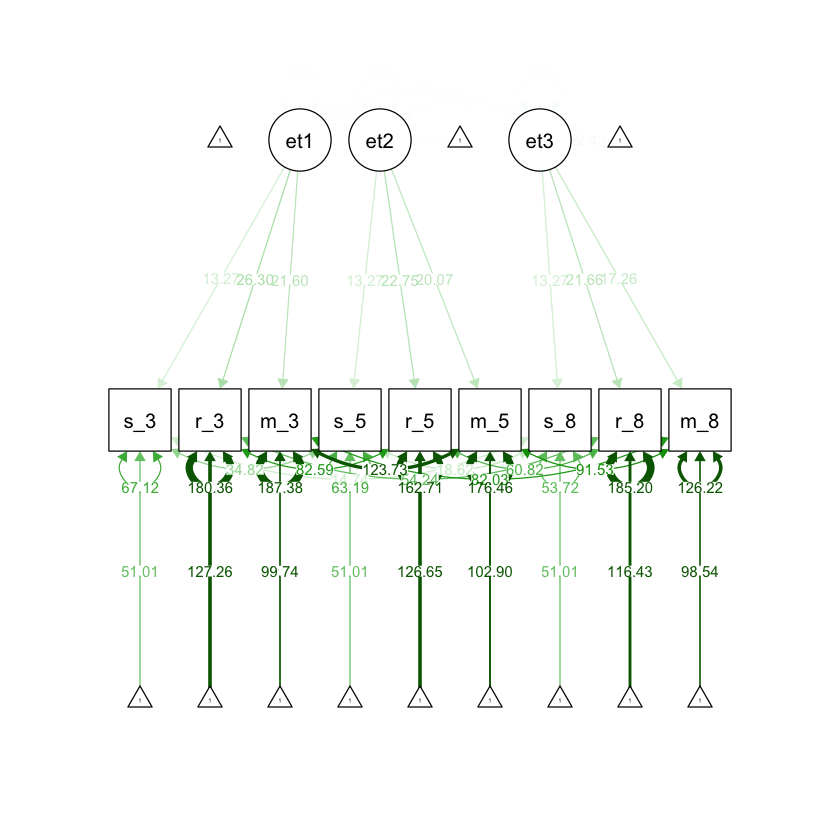

In [9]:
semPaths(fit_configural,
  what = "est",
  sizeLat = 7, sizeMan = 7, edge.label.cex = .75
)

### Modello di invarianza debole

Il modello di invarianza debole impone che la matrice di saturazioni fattoriali sia identica in tutte le occasioni di misurazione. Questo implica che le strutture di covarianza nel tempo siano proporzionali. Tuttavia, il modello permette che le intercette delle variabili osservate possano variare nel tempo e quindi non consente di esaminare il cambiamento longitudinale del fattore.

Definiamo il modello usando la sintassi di lavaan.

In [10]:
weak_invar <- " #opening quote
#factor loadings
  eta1 =~ lambda_S*s_g3+ #removed time-specific subscripts
          lambda_R*r_g3+
          lambda_M*m_g3
  eta2 =~ lambda_S*s_g5+
          lambda_R*r_g5+
          lambda_M*m_g5
  eta3 =~ lambda_S*s_g8+
          lambda_R*r_g8+
          lambda_M*m_g8

#latent variable variances
   eta1~~1*eta1
   eta2~~eta2
   eta3~~eta3

#latent variable covariances
   eta1~~eta2
   eta1~~eta3
   eta2~~eta3

#unique variances
   s_g3~~s_g3
   s_g5~~s_g5
   s_g8~~s_g8
   r_g3~~r_g3
   r_g5~~r_g5
   r_g8~~r_g8
   m_g3~~m_g3
   m_g5~~m_g5
   m_g8~~m_g8
#unique covariances
   s_g3~~s_g5
   s_g3~~s_g8
   s_g5~~s_g8
   r_g3~~r_g5
   r_g3~~r_g8
   r_g5~~r_g8
   m_g3~~m_g5
   m_g3~~m_g8
   m_g5~~m_g8

#latent variable intercepts
   eta1~0*1
   eta2~1
   eta3~1

#observed variable intercepts
   s_g3~tau_S*1
   s_g5~tau_S*1
   s_g8~tau_S*1
   r_g3~tau_R3*1
   r_g5~tau_R5*1
   r_g8~tau_R8*1
   m_g3~tau_M3*1
   m_g5~tau_M5*1
   m_g8~tau_M8*1
" # closing quote

Adattiamo il modello ai dati.

In [11]:
fit_weak <- lavaan(weak_invar, data = dat, mimic = "mplus")

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some cases are empty and will be ignored:
  1 2 5 6 9 11 17 26 37 43 44 53 59 61 65 66 73 77 78 81 90 91 94 95 105 106 108 109 112 115 119 120 125 126 127 129 132 136 137 142 149 150 153 155 156 158 159 160 161 162 164 170 172 176 177 178 180 181 182 183 186 191 192 193 199 206 211 213 218 231 232 237 239 241 260 263 264 271 273 276 279 281 299 300 301 308 310 315 323 324 325 326 327 350 351 352 353 356 362 364 370 372 373 375 376 378 381 386 387 392 393 402 403 404 405 406 409 412 415 420 421 422 429 438 439 443 444 449 455 458 462 464 470 476 478 480 481 483 484 485 486 489 491 494 503 508 518 523 524 541 543 548 552 554 559 561 565 569 573 574 576 579 587 593 595 600 605 607 627 632 642 643 644 646 647 648 663 664 665 666 667 677 680 682 683 687 693 695 698 701 704 713 717 719 720 731 733 734 736 751 755 758 763 764 765 767 768 769 770 772 774 781 782 799 802 818 820 822 827 829 843 84

Esaminiamo la soluzione.

In [12]:
out = summary(fit_weak, fit.measures = TRUE)
print(out)

lavaan 0.6.15 ended normally after 208 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        43
  Number of equality constraints                     8

                                                  Used       Total
  Number of observations                          1478        2108
  Number of missing patterns                        24            

Model Test User Model:
                                                      
  Test statistic                               116.826
  Degrees of freedom                                19
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                             11669.413
  Degrees of freedom                                36
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.99

Generiamo diagramma di percorso.

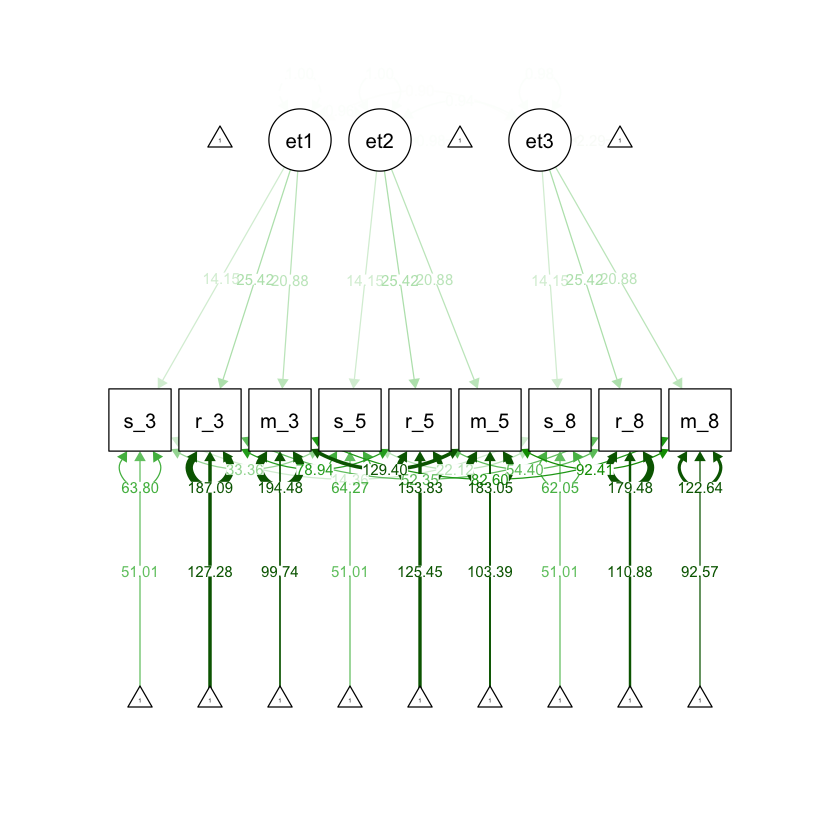

In [13]:
semPaths(fit_weak,
  what = "est",
  sizeLat = 7, sizeMan = 7, edge.label.cex = .75
)

### Modello di invarianza forte

Il modello di invarianza forte impone che le intercette delle variabili osservate siano uguali nel tempo, mentre le medie delle variabili latenti possono variare nelle diverse occasioni. Poiché tutti i cambiamenti nelle medie delle variabili osservate sono attribuiti ai fattori, la scala delle variabili latenti è uguale nelle diverse occasioni di misurazione.

Scriviamo il modello nella sintassi di lavaan.

In [14]:
strong_invar <- " #opening quote
#factor loadings
  eta1 =~ lambda_S*s_g3+ #removed time-specific subscripts
          lambda_R*r_g3+
          lambda_M*m_g3
  eta2 =~ lambda_S*s_g5+
          lambda_R*r_g5+
          lambda_M*m_g5
  eta3 =~ lambda_S*s_g8+
          lambda_R*r_g8+
          lambda_M*m_g8

#latent variable variances
   eta1~~1*eta1
   eta2~~eta2
   eta3~~eta3

#latent variable covariances
   eta1~~eta2
   eta1~~eta3
   eta2~~eta3

#unique variances
   s_g3~~s_g3
   s_g5~~s_g5
   s_g8~~s_g8
   r_g3~~r_g3
   r_g5~~r_g5
   r_g8~~r_g8
   m_g3~~m_g3
   m_g5~~m_g5
   m_g8~~m_g8
#unique covariances
   s_g3~~s_g5
   s_g3~~s_g8
   s_g5~~s_g8
   r_g3~~r_g5
   r_g3~~r_g8
   r_g5~~r_g8
   m_g3~~m_g5
   m_g3~~m_g8
   m_g5~~m_g8

#latent variable intercepts
   eta1~0*1
   eta2~1
   eta3~1

#observed variable intercepts
   s_g3~tau_S*1 #removed time-specific subscripts
   s_g5~tau_S*1
   s_g8~tau_S*1
   r_g3~tau_R*1
   r_g5~tau_R*1
   r_g8~tau_R*1
   m_g3~tau_M*1
   m_g5~tau_M*1
   m_g8~tau_M*1
" # closing quote

Adattiamo il modello ai dati.

In [15]:
fit_strong <- lavaan(strong_invar, data = dat, mimic = "mplus")

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some cases are empty and will be ignored:
  1 2 5 6 9 11 17 26 37 43 44 53 59 61 65 66 73 77 78 81 90 91 94 95 105 106 108 109 112 115 119 120 125 126 127 129 132 136 137 142 149 150 153 155 156 158 159 160 161 162 164 170 172 176 177 178 180 181 182 183 186 191 192 193 199 206 211 213 218 231 232 237 239 241 260 263 264 271 273 276 279 281 299 300 301 308 310 315 323 324 325 326 327 350 351 352 353 356 362 364 370 372 373 375 376 378 381 386 387 392 393 402 403 404 405 406 409 412 415 420 421 422 429 438 439 443 444 449 455 458 462 464 470 476 478 480 481 483 484 485 486 489 491 494 503 508 518 523 524 541 543 548 552 554 559 561 565 569 573 574 576 579 587 593 595 600 605 607 627 632 642 643 644 646 647 648 663 664 665 666 667 677 680 682 683 687 693 695 698 701 704 713 717 719 720 731 733 734 736 751 755 758 763 764 765 767 768 769 770 772 774 781 782 799 802 818 820 822 827 829 843 84

Esaminiamo la soluzione.

In [16]:
out = summary(fit_strong, fit.measures = TRUE)
print(out)

lavaan 0.6.15 ended normally after 217 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        43
  Number of equality constraints                    12

                                                  Used       Total
  Number of observations                          1478        2108
  Number of missing patterns                        24            

Model Test User Model:
                                                      
  Test statistic                               540.750
  Degrees of freedom                                23
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                             11669.413
  Degrees of freedom                                36
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.95

Generiamo il diagramma di percorso.

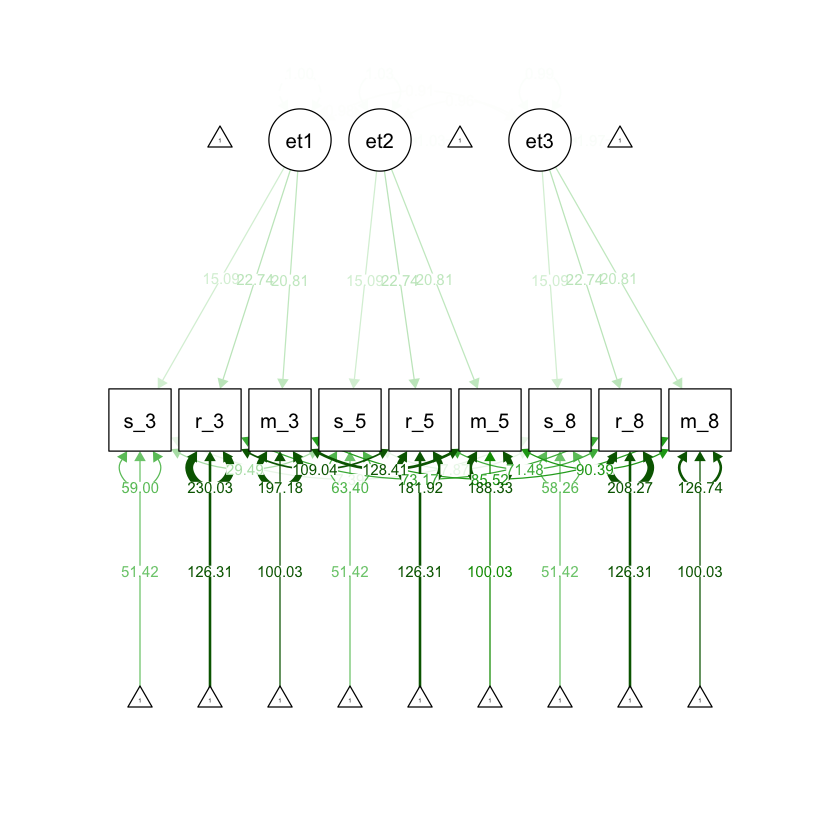

In [17]:
semPaths(fit_strong,
  what = "est",
  sizeLat = 7, sizeMan = 7, edge.label.cex = .75
)

### Invarianza stretta

Il modello di invarianza rigorosa impone vincoli aggiuntivi sulle saturazioni fattoriali, sulle intercette delle variabili osservate e sulle varianze uniche. Quando l’invarianza fattoriale rigorosa è soddisfatta, i cambiamenti longitudinali nelle medie osservate, nelle varianze e nelle covarianze ci informano sui cambiamenti longitudinali dei fattori.

Definiamo il modello con la sintassi di lavaan.

In [18]:
strict_invar <- " #opening quote
#factor loadings
  eta1 =~ lambda_S*s_g3+ #removed time-specific subscripts
          lambda_R*r_g3+
          lambda_M*m_g3
  eta2 =~ lambda_S*s_g5+
          lambda_R*r_g5+
          lambda_M*m_g5
  eta3 =~ lambda_S*s_g8+
          lambda_R*r_g8+
          lambda_M*m_g8

#latent variable variances
   eta1~~1*eta1
   eta2~~eta2
   eta3~~eta3

#latent variable covariances
   eta1~~eta2
   eta1~~eta3
   eta2~~eta3

#unique variances
   s_g3~~theta_S*s_g3 #adding constraints with names
   s_g5~~theta_S*s_g5
   s_g8~~theta_S*s_g8
   r_g3~~theta_R*r_g3
   r_g5~~theta_R*r_g5
   r_g8~~theta_R*r_g8
   m_g3~~theta_M*m_g3
   m_g5~~theta_M*m_g5
   m_g8~~theta_M*m_g8
#unique covariances
   s_g3~~s_g5
   s_g3~~s_g8
   s_g5~~s_g8
   r_g3~~r_g5
   r_g3~~r_g8
   r_g5~~r_g8
   m_g3~~m_g5
   m_g3~~m_g8
   m_g5~~m_g8

#latent variable intercepts
   eta1~0*1
   eta2~1
   eta3~1

#observed variable intercepts
   s_g3~tau_S*1 #removed time-specific subscripts
   s_g5~tau_S*1
   s_g8~tau_S*1
   r_g3~tau_R*1
   r_g5~tau_R*1
   r_g8~tau_R*1
   m_g3~tau_M*1
   m_g5~tau_M*1
   m_g8~tau_M*1
" # closing quote

Adattiamo il modello ai dati.

In [19]:
fit_strict <- lavaan(strict_invar, data = dat, mimic = "mplus")

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some cases are empty and will be ignored:
  1 2 5 6 9 11 17 26 37 43 44 53 59 61 65 66 73 77 78 81 90 91 94 95 105 106 108 109 112 115 119 120 125 126 127 129 132 136 137 142 149 150 153 155 156 158 159 160 161 162 164 170 172 176 177 178 180 181 182 183 186 191 192 193 199 206 211 213 218 231 232 237 239 241 260 263 264 271 273 276 279 281 299 300 301 308 310 315 323 324 325 326 327 350 351 352 353 356 362 364 370 372 373 375 376 378 381 386 387 392 393 402 403 404 405 406 409 412 415 420 421 422 429 438 439 443 444 449 455 458 462 464 470 476 478 480 481 483 484 485 486 489 491 494 503 508 518 523 524 541 543 548 552 554 559 561 565 569 573 574 576 579 587 593 595 600 605 607 627 632 642 643 644 646 647 648 663 664 665 666 667 677 680 682 683 687 693 695 698 701 704 713 717 719 720 731 733 734 736 751 755 758 763 764 765 767 768 769 770 772 774 781 782 799 802 818 820 822 827 829 843 84

Esaminiamo la soluzione ottenuta.

In [20]:
out = summary(fit_strict, fit.measures = TRUE)
print(out)

lavaan 0.6.15 ended normally after 267 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        43
  Number of equality constraints                    18

                                                  Used       Total
  Number of observations                          1478        2108
  Number of missing patterns                        24            

Model Test User Model:
                                                      
  Test statistic                               600.614
  Degrees of freedom                                29
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                             11669.413
  Degrees of freedom                                36
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.95

Generiamo il diagramma di percorso.

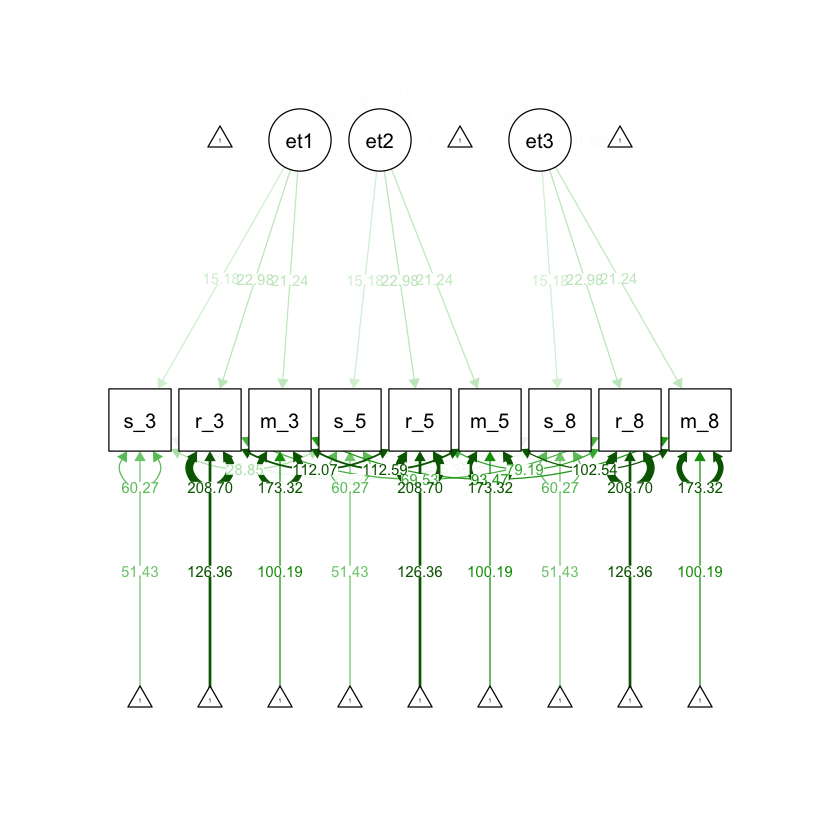

In [21]:
semPaths(fit_strict,
  what = "est",
  sizeLat = 7, sizeMan = 7, edge.label.cex = .75
)

## Confronto tra modelli

È possibile valutare il tipo di invarianza fattoriale longitudinale giustificata dai dati mediante un confronto tra modelli.

In [22]:
round(cbind(
  configural = inspect(fit_configural, "fit.measures"),
  weak = inspect(fit_weak, "fit.measures"),
  strong = inspect(fit_strong, "fit.measures"),
  strict = inspect(fit_strict, "fit.measures")
), 3)

,configural,weak,strong,strict
npar,39.000,35.000,31.000,25.000
fmin,0.012,0.040,0.183,0.203
chisq,35.522,116.826,540.750,600.614
df,15.000,19.000,23.000,29.000
pvalue,0.002,0.000,0.000,0.000
baseline.chisq,11669.413,11669.413,11669.413,11669.413
baseline.df,36.000,36.000,36.000,36.000
baseline.pvalue,0.000,0.000,0.000,0.000
cfi,0.998,0.992,0.955,0.951
tli,0.996,0.984,0.930,0.939


In [23]:
# Chi-square difference test for nested models
anova(fit_configural, fit_weak)

,Df,AIC,BIC,Chisq,Chisq diff,RMSEA,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
fit_configural,15,83914.19,84120.83,35.52179,NA,NA,NA,NA
fit_weak,19,83987.49,84172.94,116.82627,81.30448,0.1143497,4,9.217096e-17


In [24]:
anova(fit_weak, fit_strong)

,Df,AIC,BIC,Chisq,Chisq diff,RMSEA,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
fit_weak,19,83987.49,84172.94,116.8263,NA,NA,NA,NA
fit_strong,23,84403.42,84567.67,540.7503,423.9241,0.2665129,4,1.880876e-90


In [25]:
anova(fit_strong, fit_strict)

,Df,AIC,BIC,Chisq,Chisq diff,RMSEA,Df diff,Pr(>Chisq)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
fit_strong,23,84403.42,84567.67,540.7503,NA,NA,NA,NA
fit_strict,29,84451.28,84583.74,600.6135,59.86317,0.0779351,6,4.798497e-11


Nel caso presente, solo l'invarianza configurale è giustificata dal test di verosimiglianze. L'esame degli indici di bontà di adattamento, comunque, suggerisce che l'invarianza debole sembra giustificata per questi dati. @grimm2016growth concludono invece che anche l'invarianza forte è giustificata per questi dati.

## Second-Order Growth Model

Una volta che abbiamo dimostrato che l’invarianza forte o rigorosa è supportata per il modello di crescita latente, possiamo esaminare i cambiamenti nei punteggi  fattoriali.

In questo esempio, imponiamo l’invarianza fattoriale rigorosa e modelliamo il cambiamento nei punteggi fattoriali del rendimento accademico dei bambini utilizzando un Second-Order Growth Model. Si noti che devono essere apportate alcune altre modifiche per l’identificazione e la scala. 


In [26]:
growth_strict_invar <- " #opening quote
#factor loadings
  eta1 =~ 15.176*s_g3+ #constrained for identification and scaling
          lambda_R*r_g3+
          lambda_M*m_g3
  eta2 =~ 15.176*s_g5+
          lambda_R*r_g5+
          lambda_M*m_g5
  eta3 =~ 15.176*s_g8+
          lambda_R*r_g8+
          lambda_M*m_g8

#latent variable variances
   eta1~~psi*eta1
   eta2~~psi*eta2
   eta3~~psi*eta3

#latent variable covariances
   eta1~~0*eta2 #constrained to zero
   eta1~~0*eta3
   eta2~~0*eta3

#unique variances
   s_g3~~theta_S*s_g3 #adding constraints with names
   s_g5~~theta_S*s_g5
   s_g8~~theta_S*s_g8
   r_g3~~theta_R*r_g3
   r_g5~~theta_R*r_g5
   r_g8~~theta_R*r_g8
   m_g3~~theta_M*m_g3
   m_g5~~theta_M*m_g5
   m_g8~~theta_M*m_g8
#unique covariances
   s_g3~~s_g5
   s_g3~~s_g8
   s_g5~~s_g8
   r_g3~~r_g5
   r_g3~~r_g8
   r_g5~~r_g8
   m_g3~~m_g5
   m_g3~~m_g8
   m_g5~~m_g8

#latent variable intercepts
   eta1~0*1  #fixed to zero
   eta2~0*1
   eta3~0*1

#observed variable intercepts
   s_g3~tau_S*1 #removed time-specific subscripts
   s_g5~tau_S*1
   s_g8~tau_S*1
   r_g3~tau_R*1
   r_g5~tau_R*1
   r_g8~tau_R*1
   m_g3~tau_M*1
   m_g5~tau_M*1
   m_g8~tau_M*1

#second-order latent basis growth
  #growth factors
   xi_1 =~ 1*eta1+ #intercept factor
           1*eta2+
           1*eta3
   xi_2 =~ 0*eta1  #latent basis slope factor
           +start(0.5)*eta2
           +1*eta3
  #factor variances & covariance
    xi_1~~start(.8)*xi_1
    xi_2~~start(.5)*xi_2
    xi_1~~start(0)*xi_2
  #factor intercepts
    xi_1~0*1
    xi_2~1
" # closing quote

Adattiamo il modello ai dati.

In [27]:
fit_growth <- lavaan(growth_strict_invar, data = dat, mimic = "mplus")

Warning message in lav_data_full(data = data, group = group, cluster = cluster, :
“lavaan WARNING: some cases are empty and will be ignored:
  1 2 5 6 9 11 17 26 37 43 44 53 59 61 65 66 73 77 78 81 90 91 94 95 105 106 108 109 112 115 119 120 125 126 127 129 132 136 137 142 149 150 153 155 156 158 159 160 161 162 164 170 172 176 177 178 180 181 182 183 186 191 192 193 199 206 211 213 218 231 232 237 239 241 260 263 264 271 273 276 279 281 299 300 301 308 310 315 323 324 325 326 327 350 351 352 353 356 362 364 370 372 373 375 376 378 381 386 387 392 393 402 403 404 405 406 409 412 415 420 421 422 429 438 439 443 444 449 455 458 462 464 470 476 478 480 481 483 484 485 486 489 491 494 503 508 518 523 524 541 543 548 552 554 559 561 565 569 573 574 576 579 587 593 595 600 605 607 627 632 642 643 644 646 647 648 663 664 665 666 667 677 680 682 683 687 693 695 698 701 704 713 717 719 720 731 733 734 736 751 755 758 763 764 765 767 768 769 770 772 774 781 782 799 802 818 820 822 827 829 843 84

Esaminiamo la soluzione.

In [28]:
out = summary(fit_growth, fit.measures = TRUE)
print(out)

lavaan 0.6.15 ended normally after 192 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        41
  Number of equality constraints                    18

                                                  Used       Total
  Number of observations                          1478        2108
  Number of missing patterns                        24            

Model Test User Model:
                                                      
  Test statistic                               606.985
  Degrees of freedom                                31
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                             11669.413
  Degrees of freedom                                36
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.95

Generiamo il diagramma di percorso.

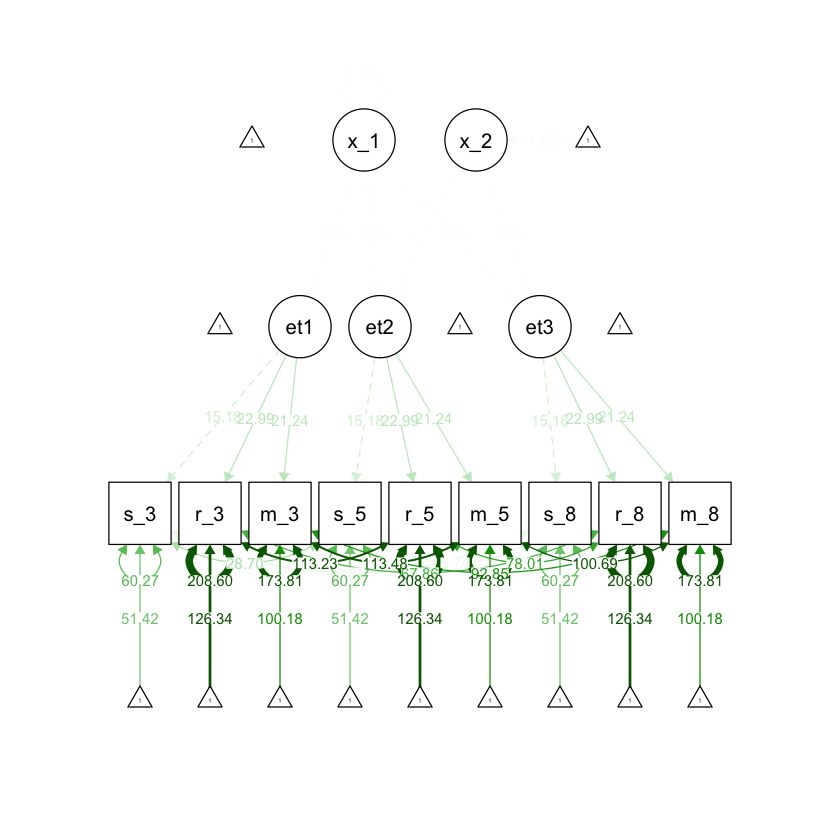

In [29]:
semPaths(fit_growth,
  what = "est",
  sizeLat = 7, sizeMan = 7, edge.label.cex = .75
)

## Traiettorie di sviluppo

Possiamo visualizzare le traiettorie previste dei punteggi fattoriali nel modo seguente.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


Warning message:
“Removed 1890 rows containing missing values (`geom_line()`).”


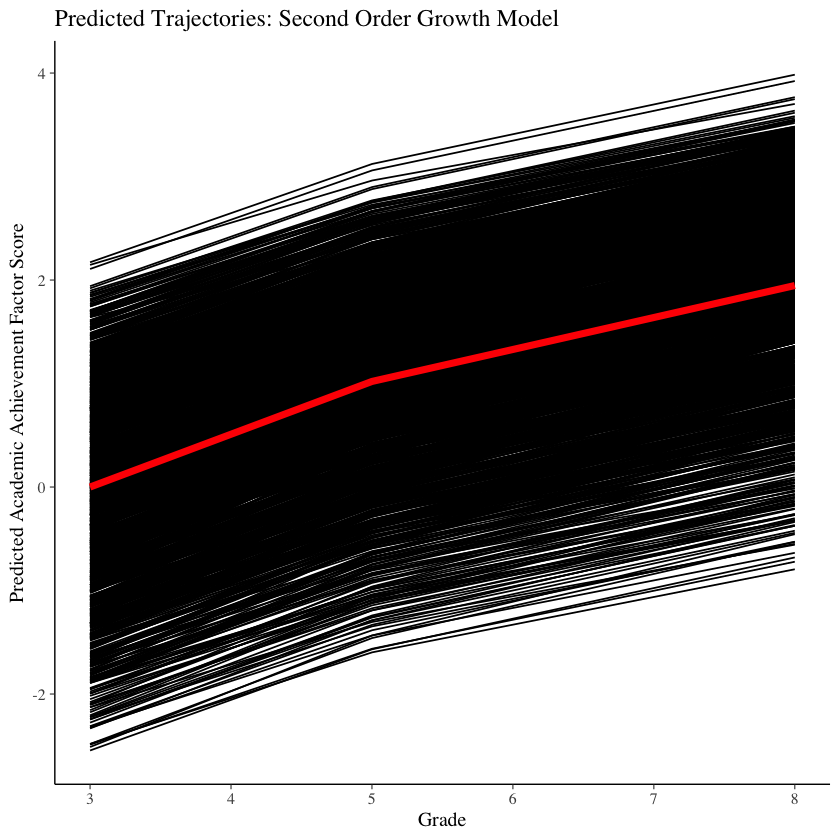

In [30]:
# extract predicted factor scores
pred <- as.data.frame(lavPredict(fit_growth))

# define function to fit factor trajectories
fit.line <- function(xi1, xi2, t) {
  xi1 + xi2 * t
}
time <- c(0, .524, 1)

# fit trajectories using estimated factor scores
out <- NULL
temp <- NULL
for (i in 1:nrow(pred)) {
  temp <- fit.line(pred$xi_1[i], pred$xi_2[i], time)
  out <- rbind(out, temp)
}
out <- as.data.frame(out)
colnames(out) <- c("pred3", "pred5", "pred8")
out$ID <- dat$id

# reshape estimated scores to long format (for plotting)
outlong <- reshape(out,
  varying = c("pred3", "pred5", "pred8"),
  timevar = "grade",
  idvar = "ID",
  direction = "long", sep = ""
)
outlong <- outlong[order(outlong$ID, outlong$grade), ]

# fit average trajectory (for plotting)
avg <- as.data.frame(fit.line(0, 1.947, time))
avg$grade <- c(3, 5, 8)
avg$ID <- 1
colnames(avg) <- c("fit", "grade", "ID")

# plot predicted common factor trajectories (average in red)
ggplot(data = outlong, aes(x = grade, y = pred, group = ID)) +
  ggtitle("Predicted Trajectories: Second Order Growth Model") +
  xlab("Grade") +
  ylab("Predicted Academic Achievement Factor Score") +
  geom_line() +
  geom_line(data = avg, aes(x = grade, y = fit, group = ID), color = "red", size = 2)

## Conclusione

Utilizzando più indicatori all’interno del framework di analisi dei fattori longitudinali, possiamo descrivere il cambiamento con maggiore precisione. Questo perché siamo in grado di filtrare il rumore di misura utilizzando un modello di misura multivariato. In questo modo, possiamo espandere le possibilità di indagine e studio delle differenze interindividuali nel cambiamento intra-individuale.